**Code Implementation Task:** Implement code to fill the missing data (impute) in daily_vaccinations column per country with the minimum daily vaccination number of relevant countries.  
Note: If a country does not have any valid vaccination number yet, fill it with “0” (zero).

In [32]:
#We are including the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno


In [33]:
data=pd.read_csv("country_vaccination_stats.csv") #We are reading the CSV file.

In [34]:
dataCopy=data
dataCopy #We are visualizing our data.

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [35]:
dataCopy.info() #We are displaying the memory footprint and variable types of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             1502 non-null   object 
 1   date                1502 non-null   object 
 2   daily_vaccinations  1442 non-null   float64
 3   vaccines            1502 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.1+ KB


In [36]:
dataCopy.isnull().sum() #We are displaying the total missing values in our data.

country                0
date                   0
daily_vaccinations    60
vaccines               0
dtype: int64

<Axes: >

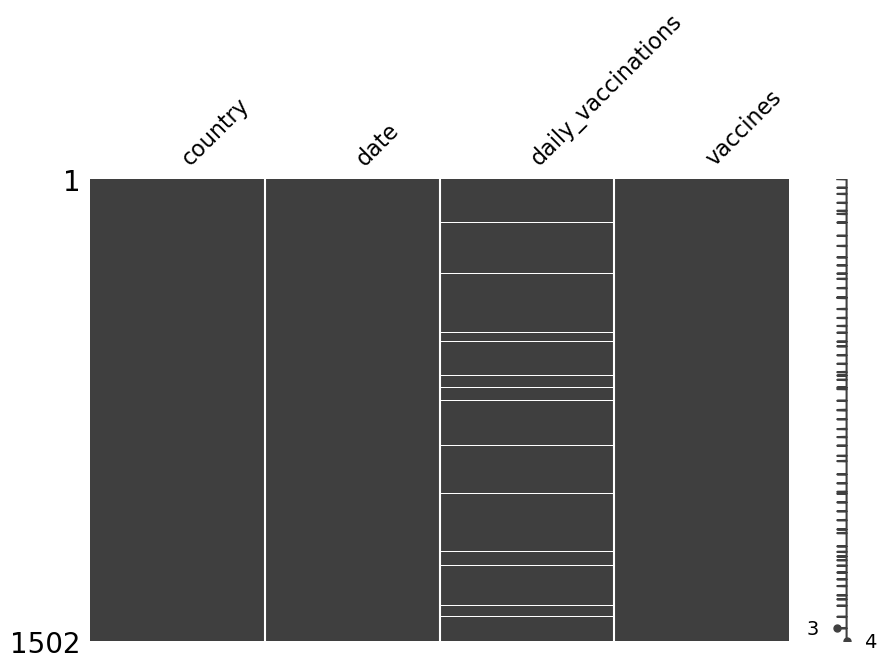

In [37]:
missingno.matrix(dataCopy,figsize=(10,6)) #We visualize missing values in our data to see them.

In [38]:
dataCopy[dataCopy["daily_vaccinations"].isna()] #"We use it to see missing data in our dataset."

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
28,Austria,1/5/2021,NaN,Pfizer/BioNTech
48,Bahrain,12/23/2020,NaN,"Pfizer/BioNTech, Sinopharm"
77,Belgium,12/28/2020,NaN,Pfizer/BioNTech
103,Brazil,1/16/2021,NaN,Sinovac
113,Bulgaria,12/29/2020,NaN,"Moderna, Pfizer/BioNTech"
141,Canada,12/14/2020,NaN,"Moderna, Pfizer/BioNTech"
184,Chile,12/24/2020,NaN,Pfizer/BioNTech
217,China,12/15/2020,NaN,"CNBG, Sinovac"
254,Costa Rica,12/24/2020,NaN,Pfizer/BioNTech


In [39]:
dataCopy.groupby("country")["daily_vaccinations"].min() #We use it to find the daily minimum vaccination value by countries.

country
Argentina                 6483.0
Austria                   3368.0
Bahrain                    943.0
Belgium                      1.0
Brazil                     112.0
Bulgaria                   472.0
Canada                     866.0
Chile                       51.0
China                   187500.0
Costa Rica                 240.0
Croatia                    989.0
Cyprus                     534.0
Czechia                   1822.0
Denmark                   1994.0
Ecuador                    108.0
England                  37625.0
Estonia                    309.0
Finland                    459.0
France                    5000.0
Germany                  19721.0
Gibraltar                  520.0
Greece                     549.0
Hungary                   1339.0
Iceland                     63.0
India                   112150.0
Indonesia                11823.0
Ireland                    550.0
Isle of Man                 90.0
Israel                    6887.0
Italy                      926.0
Ku

In [40]:
#As seen above, the minimum value in country Kuwait is given as NaN. From this, we can infer that the data in country Kuwait consists of NaN values. 
#Therefore, they should be filled with 0.
dataCopy[dataCopy["country"]=="Kuwait"] #We use it to display data related to country Kuwait.

,country,date,daily_vaccinations,vaccines
750,Kuwait,12/28/2020,NaN,Pfizer/BioNTech


In [41]:
#Below, we will complete the missing data in our dataset.

countries=dataCopy["country"].unique() #We use it to find unique countries in our dataset

for country in countries:
    value=dataCopy[dataCopy["country"]==country]["daily_vaccinations"].min()
    if str(value)!="nan":
        dataCopy.loc[dataCopy["country"]==country,"daily_vaccinations"]=value
    else:
        dataCopy.loc[dataCopy["country"]==country,"daily_vaccinations"]=0
  


In [42]:
dataCopy[dataCopy["daily_vaccinations"].isna()].size #We use it to display the number of missing data in our dataset.

0

In [43]:
dataCopy.info() ##We are displaying the memory footprint and variable types of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             1502 non-null   object 
 1   date                1502 non-null   object 
 2   daily_vaccinations  1502 non-null   float64
 3   vaccines            1502 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.1+ KB


In [44]:
dataCopy.groupby("country")["daily_vaccinations"].min() #We use it to find the daily minimum vaccination value by countries.

country
Argentina                 6483.0
Austria                   3368.0
Bahrain                    943.0
Belgium                      1.0
Brazil                     112.0
Bulgaria                   472.0
Canada                     866.0
Chile                       51.0
China                   187500.0
Costa Rica                 240.0
Croatia                    989.0
Cyprus                     534.0
Czechia                   1822.0
Denmark                   1994.0
Ecuador                    108.0
England                  37625.0
Estonia                    309.0
Finland                    459.0
France                    5000.0
Germany                  19721.0
Gibraltar                  520.0
Greece                     549.0
Hungary                   1339.0
Iceland                     63.0
India                   112150.0
Indonesia                11823.0
Ireland                    550.0
Isle of Man                 90.0
Israel                    6887.0
Italy                      926.0
Ku

In [45]:
dataCopy[dataCopy["country"]=="Kuwait"] #We use it to display data related to country Kuwait.


,country,date,daily_vaccinations,vaccines
750,Kuwait,12/28/2020,0.0,Pfizer/BioNTech


In [46]:
dataCopy #We are visualizing our data.

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,6483.0,Sputnik V
1,Argentina,12/30/2020,6483.0,Sputnik V
2,Argentina,12/31/2020,6483.0,Sputnik V
3,Argentina,1/1/2021,6483.0,Sputnik V
4,Argentina,1/2/2021,6483.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,1763.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,1763.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,1763.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,1763.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
